In [26]:
# Imports
# import tensorflow as tf
import torch
import haiku as hk
import jax
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
seed = 43
key = jax.random.PRNGKey(seed)
key, subkey = jax.random.split(key)
rng = hk.PRNGSequence(key)
print(jax.devices())

coeffs_a = jax.random.uniform(next(rng), (5,), minval = 0.5, maxval = 1.5)
display(coeffs_a)
coeffs_b = jax.random.uniform(subkey, (5,), minval = 0.5, maxval = 1.5)
display(coeffs_b)

[CpuDevice(id=0)]


Array([0.90049255, 1.2287436 , 1.2970688 , 1.3938311 , 0.6825237 ],      dtype=float32)

Array([0.84193146, 0.5630537 , 1.1447655 , 1.1455721 , 0.9150493 ],      dtype=float32)

In [27]:
feature_description = {
    'equation': tf.io.FixedLenFeature([], tf.string),
    'caption': tf.io.VarLenFeature(tf.string),
    'cond_k': tf.io.FixedLenFeature([], tf.string),
    'cond_v': tf.io.FixedLenFeature([], tf.string),
    'qoi_k': tf.io.FixedLenFeature([], tf.string),
    'qoi_v': tf.io.FixedLenFeature([], tf.string),
}
display(feature_description)

{'equation': FixedLenFeature(shape=[], dtype=tf.string, default_value=None),
 'caption': VarLenFeature(dtype=tf.string),
 'cond_k': FixedLenFeature(shape=[], dtype=tf.string, default_value=None),
 'cond_v': FixedLenFeature(shape=[], dtype=tf.string, default_value=None),
 'qoi_k': FixedLenFeature(shape=[], dtype=tf.string, default_value=None),
 'qoi_v': FixedLenFeature(shape=[], dtype=tf.string, default_value=None)}

In [29]:
with open('analysis/result_dict.pkl', 'rb') as f:
    result_dict = pickle.load(f)

error_dict = {key: value for key, value in result_dict.items() if len(key) > 1 and key[1] == 'error'}
# for key, value in result_dict.items():
#     print(key, value.shape, end = ", ", flush=True)
#     try:
#       print(np.mean(value), np.std(value), flush=True)
#     except:
#       print("", flush=True)

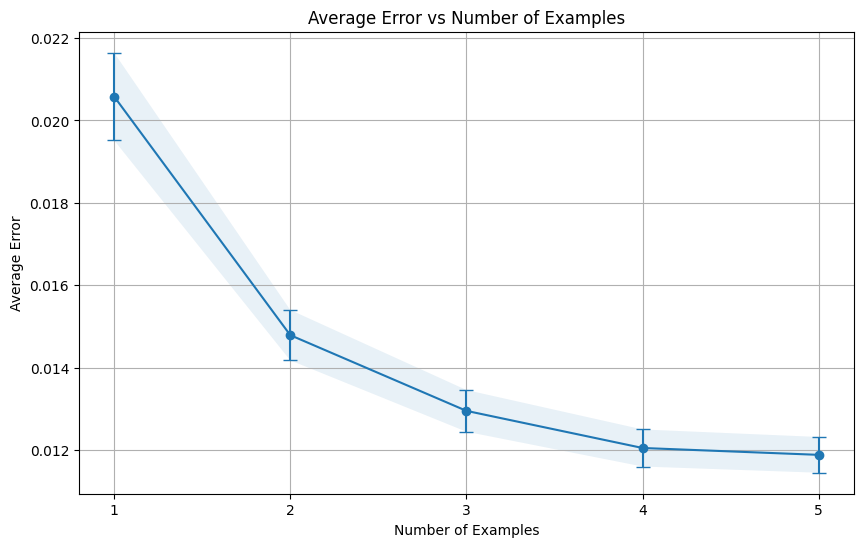

Number 1:
  Average of averages: 0.0206
  Average of standard deviations: 0.0011
Number 2:
  Average of averages: 0.0148
  Average of standard deviations: 0.0006
Number 3:
  Average of averages: 0.0130
  Average of standard deviations: 0.0005
Number 4:
  Average of averages: 0.0121
  Average of standard deviations: 0.0004
Number 5:
  Average of averages: 0.0119
  Average of standard deviations: 0.0004


In [3]:
# Initialize dictionaries to store sums and counts
avg_sums = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
std_sums = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

for key, value in error_dict.items():
    number = key[-2]  
    if number in [1, 2, 3, 4, 5]:
        avg_sums[number] += np.mean(value)
        std_sums[number] += np.std(value)/19
        counts[number] += 1

avg_of_avgs = {k: v / 19 for k, v in avg_sums.items()}
avg_of_stds = {k: v / 19 for k, v in std_sums.items()}

numbers = list(avg_of_avgs.keys())
avg_values = list(avg_of_avgs.values())
std_values = list(avg_of_stds.values())
# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(numbers, avg_values, yerr=std_values, fmt='o-', capsize=5)
# Fill in the area between the error bars
plt.fill_between(numbers, np.subtract(avg_values, std_values), np.add(avg_values, std_values), alpha=0.1)
plt.xlabel('Number of Examples')
plt.ylabel('Average Error')
plt.title('Average Error vs Number of Examples')
plt.xticks(numbers)
plt.grid(True)
plt.show()

# Print the results
for number in numbers:
    print(f"Number {number}:")
    print(f"  Average of averages: {avg_of_avgs[number]:.4f}")
    print(f"  Average of standard deviations: {avg_of_stds[number]:.4f}")

In [4]:
# for key in error_dict.keys():
#     print(key, error_dict[key].shape, np.mean(error_dict[key]), np.std(error_dict[key]))
# equation_types = list(set([key[0] for key in error_dict.keys()]))
equation_types = ['ode_auto_const_forward', 'ode_auto_const_inverse', 
                  'ode_auto_linear1_forward', 'ode_auto_linear1_inverse',
                  'ode_auto_linear2_forward', 'ode_auto_linear2_inverse',
                  'series_damped_oscillator_forward', 'series_damped_oscillator_inverse', 
                  'pde_porous_spatial_forward', 'pde_porous_spatial_inverse',
                  'pde_poisson_spatial_forward', 'pde_poisson_spatial_inverse',
                  'pde_cubic_spatial_forward', 'pde_cubic_spatial_inverse',
                  'mfc_gparam_hj_forward11',
                  'mfc_gparam_hj_forward12',
                  'mfc_gparam_hj_forward22',
                  'mfc_rhoparam_hj_forward11', 
                  'mfc_rhoparam_hj_forward12']

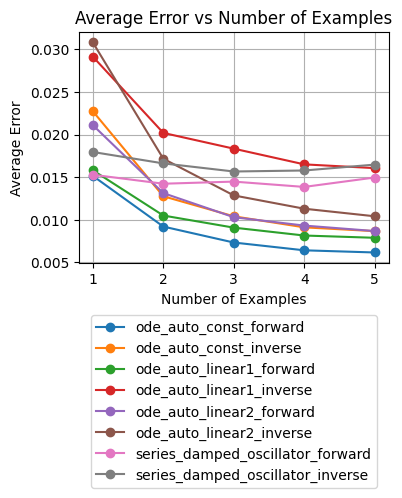

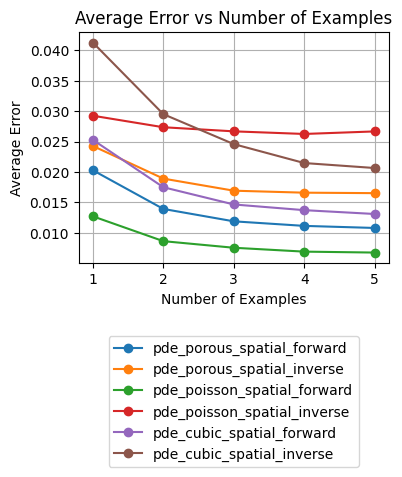

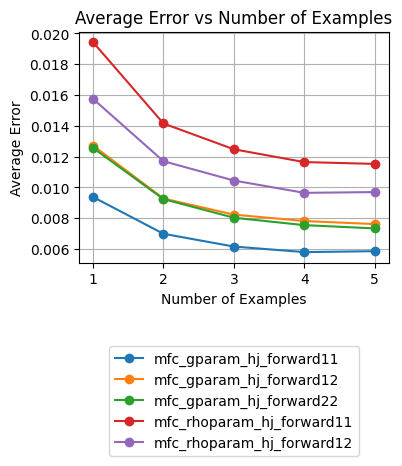

In [5]:
plt.figure(figsize=(4, 3))
for equation in equation_types[:8]:
    mean_errors = []
    for i in range(1,6):
        mean_error = np.mean(error_dict[(equation, 'error', i, -1)])
        mean_errors.append(mean_error)
    plt.plot(range(1, 6), mean_errors, 'o-', label=equation)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.6))
plt.xlabel('Number of Examples')
plt.ylabel('Average Error')
plt.title('Average Error vs Number of Examples')
plt.grid(True)

plt.figure(figsize=(4, 3))
for equation in equation_types[8:14]:
    mean_errors = []
    for i in range(1,6):
        mean_error = np.mean(error_dict[(equation, 'error', i, -1)])
        mean_errors.append(mean_error)
    plt.plot(range(1, 6), mean_errors, 'o-', label=equation)
# place the legend outside the plot
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.6))
plt.xlabel('Number of Examples')
plt.ylabel('Average Error')
plt.title('Average Error vs Number of Examples')
plt.grid(True)

plt.figure(figsize=(4, 3))
for equation in equation_types[14:]:
    mean_errors = []
    for i in range(1,6):
        mean_error = np.mean(error_dict[(equation, 'error', i, -1)])
        mean_errors.append(mean_error)
    plt.plot(range(1, 6), mean_errors, 'o-', label=equation)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.6))
plt.xlabel('Number of Examples')
plt.ylabel('Average Error')
plt.title('Average Error vs Number of Examples')
plt.grid(True)

[[[ 0.71780235]
  [ 0.62540406]
  [ 0.84920007]
  ...
  [ 0.64984185]
  [ 0.9109649 ]
  [ 0.9109649 ]]

 [[ 0.88539416]
  [ 0.7284749 ]
  [ 0.6490888 ]
  ...
  [ 0.80709773]
  [ 0.7558678 ]
  [ 0.7802608 ]]

 [[ 0.6796929 ]
  [ 0.9152829 ]
  [ 1.049294  ]
  ...
  [ 0.91498995]
  [ 0.91498995]
  [ 0.91498995]]

 ...

 [[ 0.08837965]
  [ 0.17384851]
  [ 0.10789844]
  ...
  [ 0.21898027]
  [ 0.19927591]
  [ 0.20471856]]

 [[-0.00116029]
  [-0.10002255]
  [ 0.00926635]
  ...
  [-0.40236714]
  [-0.40236714]
  [-0.40236714]]

 [[-0.20747972]
  [-0.29661927]
  [-0.18633424]
  ...
  [-0.20338506]
  [-0.40875715]
  [-0.40875715]]] [[[ 0.7168886 ]
  [ 0.6198798 ]
  [ 0.84489864]
  ...
  [ 0.6555244 ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.8936075 ]
  [ 0.74068487]
  [ 0.6597911 ]
  ...
  [ 0.81228393]
  [ 0.76649463]
  [ 0.7845205 ]]

 [[ 0.67788595]
  [ 0.91815305]
  [ 1.0542951 ]
  ...
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 ...

 [[ 0.0864529 ]
  [ 0.1751584 ]
  [ 0.10768033]
  ..

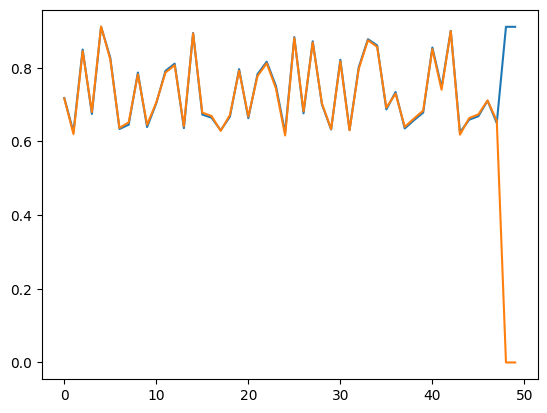

In [30]:
error_dict = {key: value for key, value in result_dict.items() if len(key) > 1 and key[1] == 'error'}

results_pred = result_dict[('pde_poisson_spatial_forward', 'pred', 5, -1)]
results_gt = result_dict[('pde_poisson_spatial_forward', 'ground_truth')]
print(results_pred, results_gt)
plt.plot(results_pred[0, :, 0])
plt.plot(results_gt[0, :, 0])

In [22]:
#start with c(t), Poisson
import data_preparation.data_utils as data_utils
import data_preparation.data_pdes as pdes 
from einshape import jax_einshape as einshape
import jax.numpy as jnp
import data_preparation.data_writetfrecord as datawrite  
import haiku as hk
import jax

def generate_pde_poisson(seed, eqns, quests, length, dx, num, caption_mode, name):
  '''
  du/dxx = c(x) over domain [0,L]
  c(x) : spatially varying coefficient, size N-1,
          we use GP to sample c(x)
  u_left, u_right: boundary conditions. 
  the output is the full solution, (N+1) grid point values.  
  '''
  N = length
  L = length * dx
  rng = hk.PRNGSequence(jax.random.PRNGKey(seed))
  coeffs_ul = jax.random.uniform(next(rng), (eqns,), minval = -1.0, maxval = 1.0)
  coeffs_ur = jax.random.uniform(next(rng), (eqns,), minval = -1.0, maxval = 1.0)
  all_xs = []; all_cs = []; all_us = []; all_params = []; all_eqn_captions = []
  for i, (coeff_ul, coeff_ur) in enumerate(zip(coeffs_ul, coeffs_ur)):
    for j in range(quests):
      xs = jnp.linspace(0.0, 1.0, N+1)# (N+1,)
      cs = data_utils.generate_gaussian_process(next(rng), xs, num, kernel = data_utils.rbf_kernel_jax, k_sigma = 2.0, k_l = 0.5) # (num, N+1)
      us = pdes.solve_poisson_batch(L, N, coeff_ul, coeff_ur, cs[:,1:-1]) # (num, N+1)
      all_xs.append(einshape("i->jik", xs, j = num, k = 1)) # (num, N+1, 1)
      all_cs.append(einshape("ij->ijk", cs, k = 1)) # (num, N+1, 1)
      all_us.append(einshape("ij->ijk", us, k = 1)) # (num, N+1, 1)
      all_params.append("{:.8f}_{:.8f}".format(coeff_ul, coeff_ur))
      all_eqn_captions.append(None)
  return all_xs, all_cs, all_us, all_params

all_xs, all_cs, all_us, all_params = generate_pde_poisson(45, 2, 1, 50, 0.02, 1, None, None)

x = all_xs[1]
c = all_cs[1]
u = all_us[1]
params = all_params[0]

: 